### GitHub Repository URL : https://github.com/WellyWong/CUBoulder-DTSA-5509

![kaggle_housesbanner](https://storage.googleapis.com/kaggle-media/competitions/kaggle/5407/media/housesbanner.png)

<h1 style="font-size: 1.8em; background-color: #CFB87C; padding:0.8em">Predicting House Prices - Ames dataset</h1>

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import boxcox1p
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, RidgeCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict, cross_validate
from sklearn.metrics import PredictionErrorDisplay
import xgboost as xgb

pd.set_option('display.float_format', lambda x: '%.3f' % x)
sns.set_theme(style='darkgrid')

<h1 style="font-size: 1.8em; background-color: #CFB87C; padding: 0.8em">Project Topic</h1>

This project uses the Ames Housing Dataset, which was compiled by Dean De Cock, a Professor of Statistics at Truman State University). It is available at https://jse.amstat.org/v19n3/decock/AmesHousing.txt

This is a supervised learning project, and the task is regression, seeking to predict the SalePrice, our target variable in the Ames dataset.

This dataset is being use in an ongoing Kaggle competition, https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques, which runs indefinitely with a rolling leaderboard.

My goal is to construct a predictive model that performs well, aiming for a score below 0.11, comparable to the top 100 leaderboard on Kaggle. Currently there are 5,178 competitors, therefore, being in the top 100 out of 5,178 competitors is approximately equivalent to being in the top 1.93% on this ongoing Kaggle competition.

The performance metric being use as the score on Kaggle is the root mean squared error between the logarithm of the predicted value and the logarithm of the observed sales price, commonly referred to as the Root Mean Squared Logarithmic Error (RMSLE).

<h1 style="font-size: 1.8em; background-color: #CFB87C; padding: 0.8em">Data</h1>

The Ames dataset has 82 columns with variables of various types:
* 23 Nominal Category
* 23 Ordinal Category
* 14 Numeric (Discrete)
* 20 Numeric (Continuous) 
* 2 Observation Identifiers

These feature variables describe a wide range of characteristics of 2,930 homes in Ames, Iowa, USA, sold during the 2006 - 2010 timeframe.

The label/target variable is SalePrice (Continous) in US dollar.

### Data Documentation
#### Source: https://jse.amstat.org/v19n3/decock/DataDocumentation.txt

| Variable | Description |
| --- | --- |
| Order (Discrete) | Observation number |
| PID (Nominal) | Parcel identification number |
| MS SubClass (Nominal) | Identifies the type of dwelling involved in the sale |	
| MS Zoning (Nominal) | Identifies the general zoning classification of the sale |
| Lot Frontage (Continuous) | Linear feet of street connected to property |
| Lot Area (Continuous) | Lot size in square feet |
| Street (Nominal | Type of road access to property |
| Alley (Nominal) | Type of alley access to property |
| Lot Shape (Ordinal) | General shape of property |
| Land Contour (Nominal) | Flatness of the property |		
| Utilities (Ordinal) | Type of utilities availablev
| Lot Config (Nominal) | Lot configuration |
| Land Slope (Ordinal) | Slope of property |
| Neighborhood (Nominal) | Physical locations within Ames city limits (map available) |
| Condition 1 (Nominal) | Proximity to various conditions |
| Condition 2 (Nominal) | Proximity to various conditions (if more than one is present) |
| Bldg Type (Nominal) | Type of dwelling |
| House Style (Nominal) | Style of dwelling |
| Overall Qual (Ordinal) | Rates the overall material and finish of the house |
| Overall Cond (Ordinal) | Rates the overall condition of the house |		
| Year Built (Discrete) | Original construction date |
| Year Remod/Add (Discrete) | Remodel date (same as construction date if no remodeling or additions) |
| Roof Style (Nominal) | Type of roof |
| Roof Matl (Nominal) | Roof material |		
| Exterior 1 (Nominal) | Exterior covering on house |
| Exterior 2 (Nominal) | Exterior covering on house (if more than one material) |
| Mas Vnr Type (Nominal) | Masonry veneer type |
| Mas Vnr Area (Continuous) | Masonry veneer area in square feet |
| Exter Qual (Ordinal) | Evaluates the quality of the material on the exterior | 
| Exter Cond (Ordinal) | Evaluates the present condition of the material on the exterior |
| Foundation (Nominal) | Type of foundation |
| Bsmt Qual (Ordinal) | Evaluates the height of the basement |
| Bsmt Cond (Ordinal) | Evaluates the general condition of the basement |
| Bsmt Exposure	(Ordinal) | Refers to walkout or garden level walls |
| BsmtFin Type 1 (Ordinal) | Rating of basement finished area |		
| BsmtFin SF 1 (Continuous) | Type 1 finished square feet |
| BsmtFinType 2	(Ordinal) | Rating of basement finished area (if multiple types) |
| BsmtFin SF 2 (Continuous) | Type 2 finished square feet |
| Bsmt Unf SF (Continuous) | Unfinished square feet of basement area |
| Total Bsmt SF (Continuous) | Total square feet of basement area |
| Heating (Nominal) | Type of heating |
| HeatingQC (Ordinal) | Heating quality and condition |
| Central Air (Nominal) | Central air conditioning |
| Electrical (Ordinal) | Electrical system |		
| 1st Flr SF (Continuous) | First Floor square feet |
| 2nd Flr SF (Continuous | Second floor square feet |
| Low Qual Fin SF (Continuous) | Low quality finished square feet (all floors) |
| Gr Liv Area (Continuous) | Above grade (ground) living area square feet |
| Bsmt Full Bath (Discrete) | Basement full bathrooms |
| Bsmt Half Bath (Discrete) | Basement half bathrooms |
| Full Bath (Discrete) | Full bathrooms above grade |
| Half Bath (Discrete) | Half baths above grade |
| Bedroom (Discrete) | Bedrooms above grade (does NOT include basement bedrooms) |
| Kitchen (Discrete) | Kitchens above grade |
| KitchenQual (Ordinal) | Kitchen quality |      	
| TotRmsAbvGrd	(Discrete) | Total rooms above grade (does not include bathrooms) |
| Functional (Ordinal) | Home functionality (Assume typical unless deductions are warranted) |
| Fireplaces (Discrete) | Number of fireplaces |
| FireplaceQu (Ordinal) | Fireplace quality |
| Garage Type (Nominal) | Garage location |		
| Garage Yr Blt (Discrete) | Year garage was built |		
| Garage Finish (Ordinal) | Interior finish of the garage |		
| Garage Cars (Discrete) | Size of garage in car capacity |
| Garage Area (Continuous) | Size of garage in square feet |
| Garage Qual (Ordinal) | Garage quality |		
| Garage Cond (Ordinal) | Garage condition |
| Paved Drive (Ordinal) | Paved driveway |
| Wood Deck SF (Continuous) | Wood deck area in square feet |
| Open Porch SF (Continuous) | Open porch area in square feet |
| Enclosed Porch (Continuous) | Enclosed porch area in square feet |
| 3-Ssn Porch (Continuous) | Three season porch area in square feet |
| Screen Porch (Continuous) | Screen porch area in square feet |
| Pool Area (Continuous) | Pool area in square feet |
| Pool QC (Ordinal) | Pool quality |
| Fence (Ordinal) | Fence quality |
| Misc Feature (Nominal) | Miscellaneous feature not covered in other categories |
| Misc Val (Continuous) | $ Value of miscellaneous feature |
| Mo Sold (Discrete) | Month Sold (MM) |
| Yr Sold (Discrete) | Year Sold (YYYY) |
| Sale Type (Nominal) | Type of sale |
| Sale Condition (Nominal) | Condition of sale |
| SalePrice (Continuous) | Sale price $$ |

<h1 style="font-size: 1.8em; background-color: #CFB87C; padding: 0.8em">Initial Exploratory Data Analysis</h1>

In [2]:
url = 'http://jse.amstat.org/v19n3/decock/AmesHousing.txt'
df = pd.read_csv(url, sep='\t')

In [3]:
# 2930 Observations, 79 Features (Excluding 'Order' and 'PID') and 1 target variable (SalePrice)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.000,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.000,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
df.shape

(2930, 82)

### Checking for duplicates

In [5]:
n_unique_IDs = len(df['PID'].unique())
n_samples = df.shape[0]
n_duplicates = n_samples - n_unique_IDs
print('There are ' + str(n_duplicates) + ' duplicate IDs for ' + str(n_samples) + ' total observations')

There are 0 duplicate IDs for 2930 total observations


In [6]:
# Drop 'Order': Observation number and 'PID': Parcel identification number
df = df.drop(['Order', 'PID'], axis=1)

### Distribution of Features

To get a better understanding of the data, we plotted certain features typically deemed significant by homebuyers against the SalePrice.

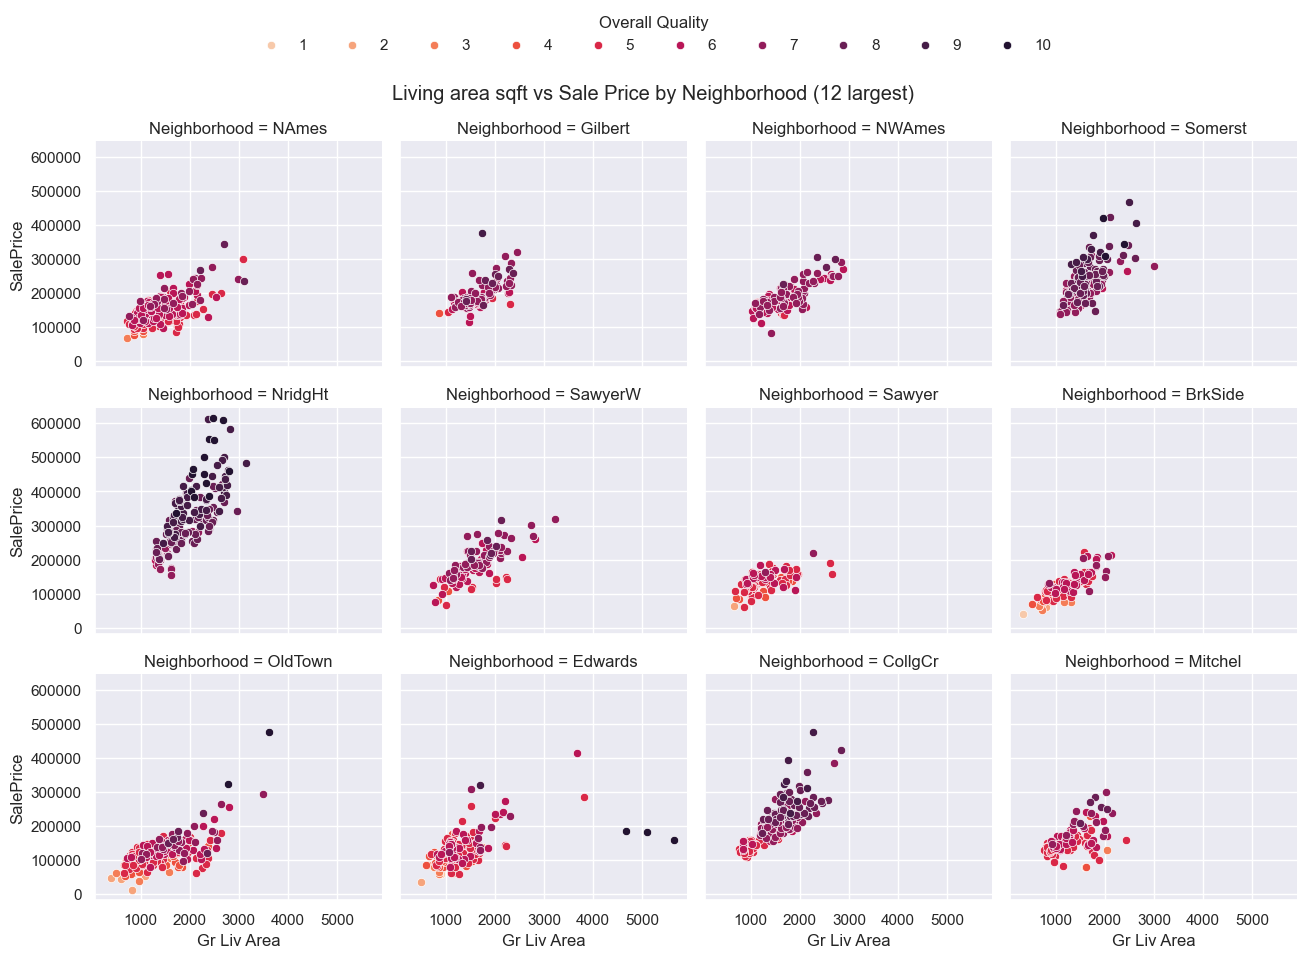

In [7]:
# Location
top12_neighborhood = df.groupby('Neighborhood')['SalePrice'].count()
top12_neighborhood = top12_neighborhood.sort_values(ascending=False)[:12].index.tolist()
df_temp = df[df['Neighborhood'].isin(top12_neighborhood)]

g = sns.FacetGrid(df_temp, col='Neighborhood', hue='Overall Qual', palette='rocket_r', col_wrap=4)
g.map(sns.scatterplot, 'Gr Liv Area', 'SalePrice')
g.add_legend(title='Overall Quality', handlelength=1, prop={'size': 12}, loc='upper left')
sns.move_legend(g, "lower center",
                bbox_to_anchor=(.5, 1), ncol=10, title='Overall Quality', frameon=False)
plt.suptitle('Living area sqft vs Sale Price by Neighborhood (12 largest)')
plt.tight_layout();

Certain neighborhoods, for example: NridgHt, Somerst, exhibit higher prices per square footage of above ground living area, suggesting that these neighborhoods are more desirable, driving higher sales price. Also notice that the Overall Quality for these neighborhoods are higher on average. Note: Overall Quality is the input variable for the hue parameter in the plot above.

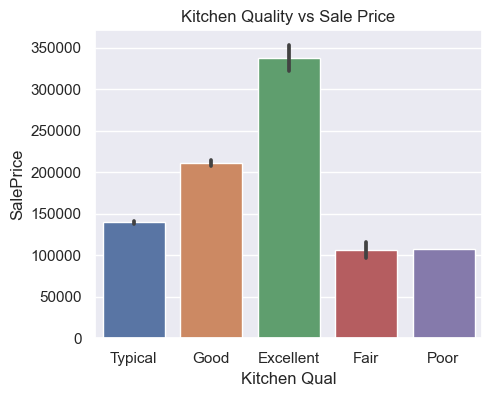

In [8]:
plt.rcParams["figure.figsize"] = (5, 4)
g = sns.barplot(data=df, x='Kitchen Qual', y='SalePrice')
g.set_xticklabels(['Typical', 'Good', 'Excellent', 'Fair', 'Poor'])
plt.title('Kitchen Quality vs Sale Price');

A Good or Excellent Kitchen Quality correspond to higher Sale Price. This seems to be an important feature in predicting sale price.

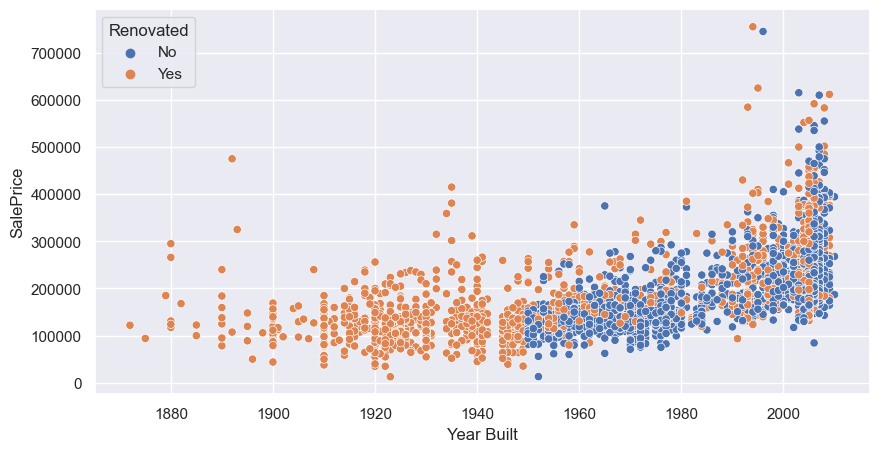

In [9]:
renovated = df['Year Built'] != df['Year Remod/Add']
renovated = renovated.replace({True: 'Yes', False: 'No'})

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Year Built', y='SalePrice', hue=renovated)
plt.legend(title='Renovated', loc='upper left');

Newer houses tend to have higher prices, which is reasonable. All houses built before 1949 were renovated.

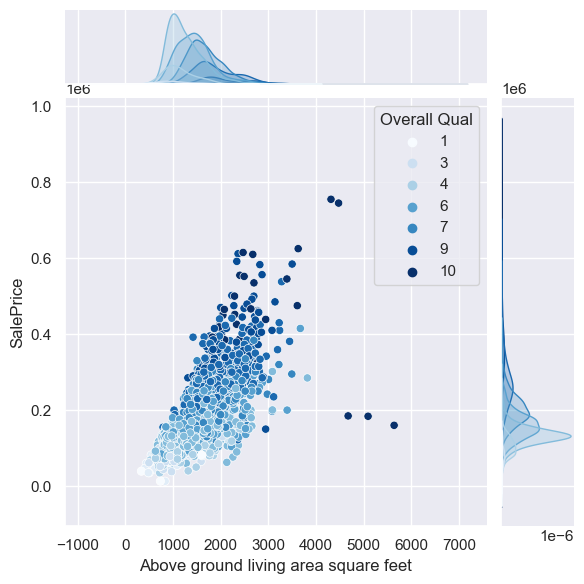

In [10]:
plt.rcParams["figure.figsize"] = (6, 4)
g = sns.jointplot(x='Gr Liv Area', y='SalePrice', hue='Overall Qual', data=df, palette='Blues')
g.ax_joint.set_xlabel('Above ground living area square feet')
plt.show();

The square footage of the living area appears to be another crucial factor in predicting the sales price. The plot also indicates that there maybe some interaction between living area square footage and the overall quality. For example, a small house with excellent quality maybe worth as much as a larger house requiring renovations.

We observed potential outliers in the plots. Additionally, both features distribution exhibit some skewness. We will need to address these issues later.

<h1 style="font-size: 1.8em; background-color: #CFB87C; padding: 0.8em">Data Cleaning</h1>

## Identifying outliers

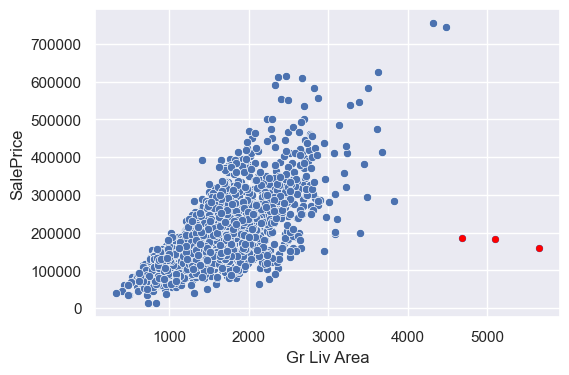

In [11]:
sns.scatterplot(data=df, x='Gr Liv Area', y='SalePrice')
plt.scatter(x=[5642, 5095, 4676], y=[160000, 183850, 184750], color='red', s=15);

In [12]:
# Get indices of the 3 outliers identified in the plot above, then drop them
idx_to_drop = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 300000)].index.values
df = df.drop(idx_to_drop, axis=0)

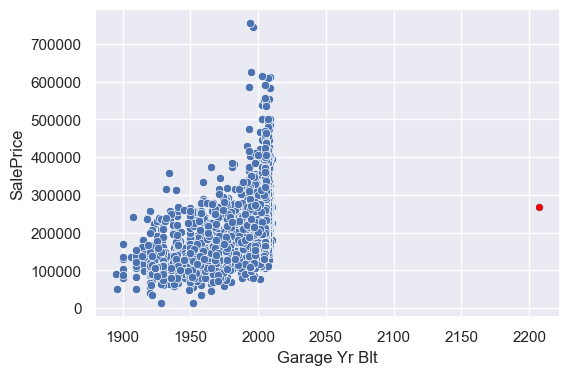

In [13]:
# Garage Yr Blt is 2207, which is an obvious error, and so we will drop this observation
sns.scatterplot(data=df, x='Garage Yr Blt', y='SalePrice')
plt.scatter(x=[2207], y=[267300], color='red', s=15);

In [14]:
idx_to_drop = df[df['Garage Yr Blt'] > 2023].index.values
df = df.drop(idx_to_drop, axis=0)

In [15]:
# Reset index since we removed some rows due to outliers
df = df.reset_index(drop=True)

In [16]:
# There's 1 more outlier that was identified by visualization from Lot Area, we will drop this row
df = df.drop([1554], axis=0)
df = df.reset_index(drop=True)

## Dealing with missing data

We refered to data documentation when deciding what type of missing value imputation is best. Some imputations were pretty direct. For example, NA in feature Fireplace Quality means that there is no fireplace, and so we replaced them with 'None'.

Others like Lot Frontage were slightly more complex, while it would have been more straightforward to just impute missing values with the mean or median of the lot frontage of all houses, I chose to impute Lot Frontage based on the median value of houses in its neighborhood, as it is most likely similar to other houses in its neighborhood.

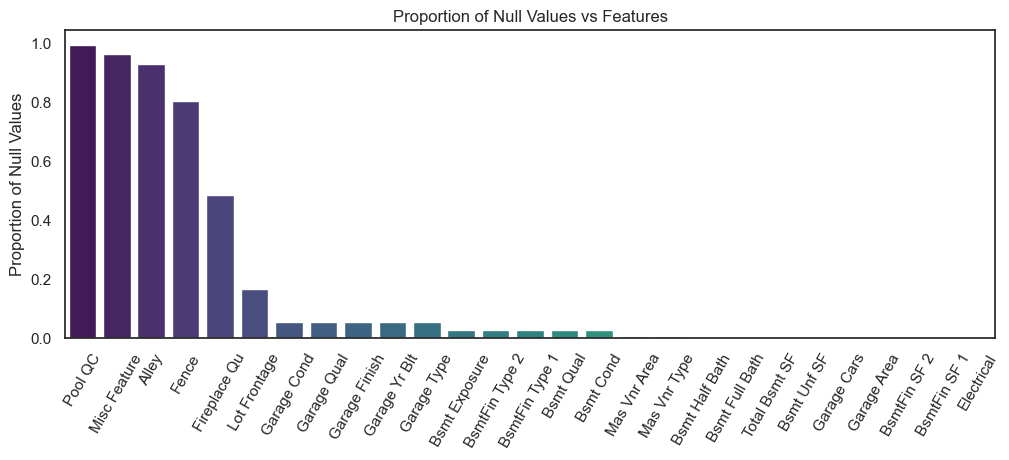

In [17]:
# Calculate number of null per column, filter out zero values, then sort
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0] / df.shape[0]
null_counts = null_counts.sort_values(ascending=False)

sns.set_theme(style='white')
plt.figure(figsize=(12, 4))
sns.barplot(x=null_counts.index, y=null_counts.values, palette='viridis')
plt.xticks(rotation=60)
plt.ylabel('Proportion of Null Values')
plt.title('Proportion of Null Values vs Features');

In [18]:
# Possible missing values
missing_vals = [np.nan, None, [], {}, 'NaN', 'Null','NULL','None','NA','?','-', '.','', ' ', '   ']

In [19]:
for column in df:
    string_null = np.array([x in missing_vals[2:] for x in df[column]])
    if string_null.sum():
        print(column, ', string null:', string_null.sum(), '  isnull:', df[column].isnull().sum())

Mas Vnr Type , string null: 1751   isnull: 22


In [20]:
df['Mas Vnr Type'].unique()

array(['Stone', 'None', 'BrkFace', nan, 'BrkCmn', 'CBlock'], dtype=object)

We will replace nan with 'None' in 'Mas Vnr Type' since it most is likely means no masonry veneer.

Related to this feature is 'Mas Vnr Area'. We will replace missing values with 0.

In [21]:
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Area'].fillna(0)

We will drop 'Pool QC' and 'Misc Feature' since both have too many missing values and thus of little information to our predictive model. 

'Pool Area' and 'Misc Val' are related to 'Pool QC' and 'Misc Feature', and so will also also drop these two features.

In [22]:
df = df.drop(['Pool QC', 'Misc Feature', 'Pool Area', 'Misc Val'], axis=1)

'Alley': NA means No alley access

'Fence': NA means No Fence

'Fireplace Qu': NA means No Fireplace

In [23]:
df['Alley'] = df['Alley'].fillna('None')
df['Fence'] = df['Fence'].fillna('None')
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

Next, we will impute 'Lot Frontage' missing values with the median Lot Frontage of the neighborhood since it is most likely similar to other houses in its neighborhood.

In [24]:
df["Lot Frontage"] = df.groupby("Neighborhood")["Lot Frontage"].transform(lambda value: value.fillna(value.median()))

In [25]:
# There are still missing values, upon further checking there are 2 neighborhoods with no Lot Frontage information.
df["Lot Frontage"].isna().sum()

3

In [26]:
df[df['Neighborhood'] == 'GrnHill']['Lot Frontage']

2252   NaN
2887   NaN
Name: Lot Frontage, dtype: float64

In [27]:
df[df['Neighborhood'] == 'Landmrk']['Lot Frontage']

2783   NaN
Name: Lot Frontage, dtype: float64

In [28]:
# Impute NA with the median Lot Frontage
df.loc[[2252, 2887, 2783], 'Lot Frontage'] = df['Lot Frontage'].median()

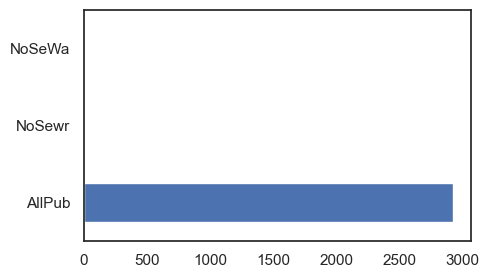

In [29]:
_, ax = plt.subplots(figsize=(5, 3))
df['Utilities'].value_counts().plot.barh(ax=ax);

In [30]:
df[df['Utilities'] == 'NoSeWa']

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Fence,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
955,20,RL,82.500,14375,Pave,None,IR1,Lvl,NoSeWa,CulDSac,...,118,0,0,233,None,1,2009,COD,Abnorml,137500


In [31]:
# Since almost all values in 'Utilities' are AllPub, it is of little information in predictive model, we will drop this feature
df = df.drop('Utilities', axis=1)

In [32]:
# Replace missing values with 'None'
for feature in ['Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type']:
    df[feature] = df[feature].fillna('None')

Replace missing values with 0 since it is likely means no garage, therefore zero Garage Area and zero Cars in such garage.

In [33]:
for feature in ['Garage Cars', 'Garage Area']:
    df[feature] = df[feature].fillna(0)

In [34]:
# Replace missing value with the min year, since it's likely means no garage and it's not reasonable to fill NA with year 0.
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(df['Garage Yr Blt'].min())

In [35]:
# Replace missing values with None since it's likely there is no basement
for feature in ['Bsmt Exposure', 'BsmtFin Type 2', 'Bsmt Qual', 'Bsmt Cond', 'BsmtFin Type 1']:
    df[feature] = df[feature].fillna('None')

In [36]:
# Replace missing values with zero for having no basement
for feature in ['Bsmt Full Bath', 'Bsmt Half Bath', 'Total Bsmt SF', 'Bsmt Unf SF',
               'BsmtFin SF 2', 'BsmtFin SF 1']:
    df[feature] = df[feature].fillna(0)

In [37]:
# Replace missing values with its mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [38]:
# Check if there is any remaining missing values
missing_vals = df.isna().sum()
missing_vals = missing_vals.drop(missing_vals[missing_vals == 0].index)
missing_vals

Series([], dtype: int64)

### Fix incorrect data type

In [39]:
df['Garage Yr Blt'].dtype

dtype('float64')

In [40]:
df['Garage Yr Blt'] = df['Garage Yr Blt'].astype(int)

<h1 style="font-size: 1.8em; background-color: #CFB87C; padding: 0.8em">More Exploratory Data Analysis</h1>

## Distribution of the target variable

Skewness = 1.7455761044128677


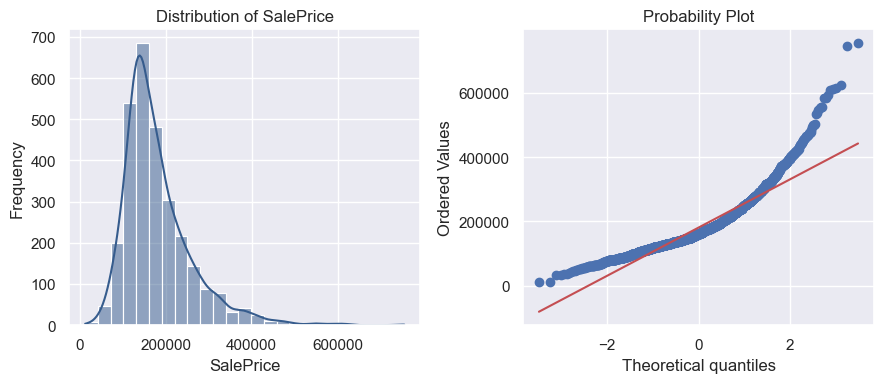

In [41]:
skewness = stats.skew(df['SalePrice'])
print('Skewness =', skewness)
sns.set_theme(style='darkgrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
sns.histplot(df['SalePrice'], kde=True, bins=25, color=sns.color_palette("viridis")[1], ax=ax1)
ax1.set_title('Distribution of SalePrice')
ax1.set_xlabel('SalePrice')
ax1.set_ylabel('Frequency')
ax2 = stats.probplot(df['SalePrice'], plot=ax2)
plt.tight_layout();

Rule of thumb for skewness: 
* skewness absolute value between 0.5 and 1 are considered moderately skewed. 
* if the skewness is less than -1 or greater than 1, the data are highly skewed.

SalePrice distribution is quite skewed, and QQ plot clearly shows that it violates the normality assumption in Linear Regression. We will apply log transformation to make it more normally distributed. 

In [42]:
# Log transform SalePrice
df['SalePrice'] = np.log(df['SalePrice'])

Skewness = -0.002737497715961243


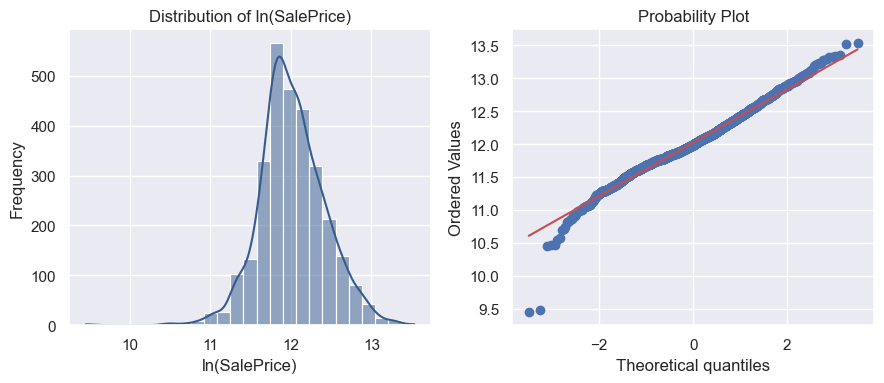

In [43]:
# Distribution after log transformation
skewness = stats.skew(df['SalePrice'])
print('Skewness =', skewness)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
sns.histplot(df['SalePrice'], kde=True, bins=25, color=sns.color_palette("viridis")[1], ax=ax1)
ax1.set_title('Distribution of ln(SalePrice)')
ax1.set_xlabel('ln(SalePrice)')
ax1.set_ylabel('Frequency')

ax2 = stats.probplot(df['SalePrice'], plot=ax2)
plt.tight_layout();

We will deal with skewness in features that have high correlation with target variable later.

### Pairwise correlation of columns

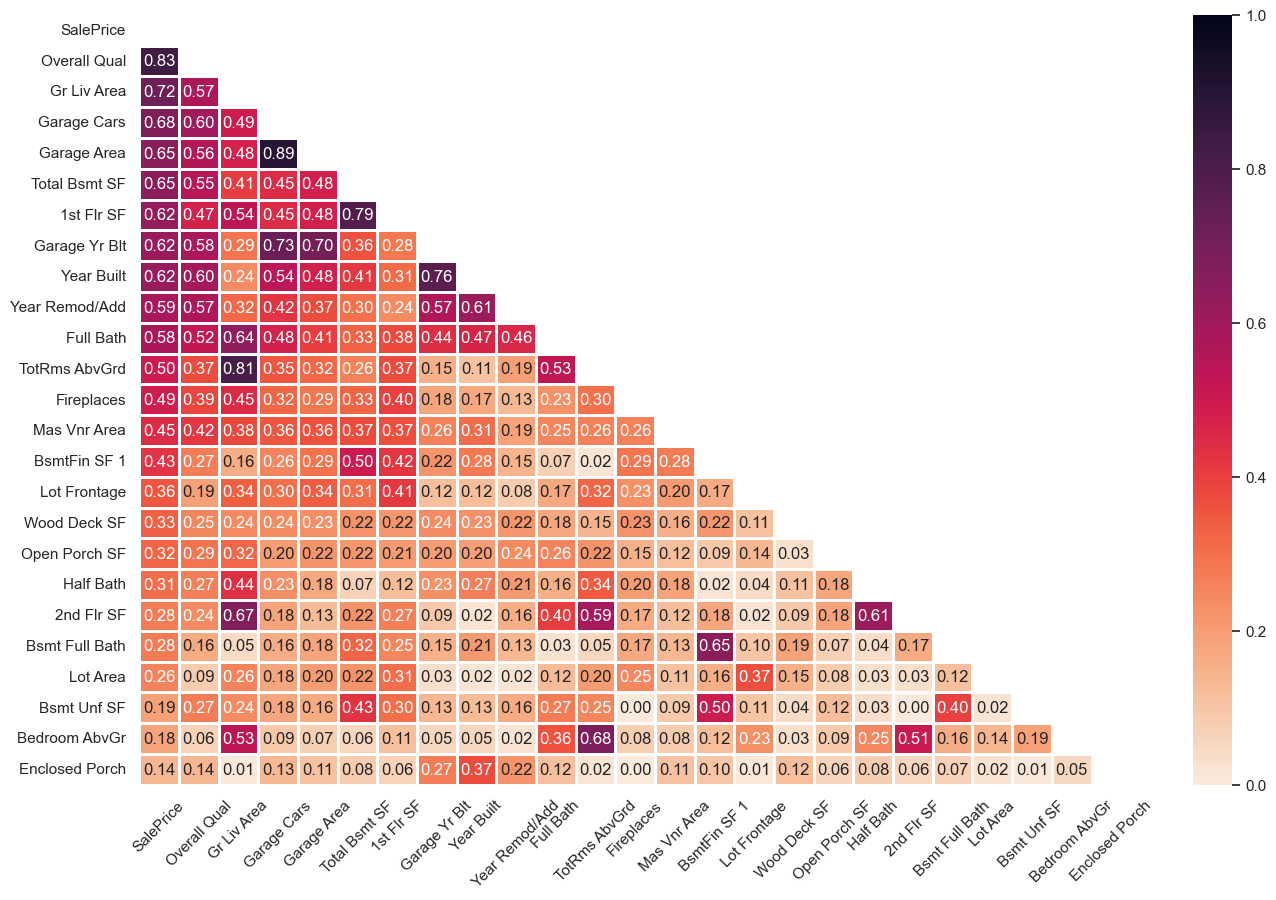

In [44]:
# Compute pairwise correlation of columns
corr_df = abs(df.select_dtypes(include=['number']).corr())

# select top 25 features that are highly correlated with SalePrice
top25 = corr_df['SalePrice'].sort_values(ascending=False)[:25]
top25_features = top25.index.tolist()
top25_df = corr_df.loc[top25_features, top25_features]

sns.set_theme(style='white')
plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(top25_df, dtype=bool))
g = sns.heatmap(top25_df, cmap='rocket_r', vmax=1, vmin=0, linewidths=1, linecolor='white',
            annot=True, fmt='.2f', mask=mask)
plt.xticks(rotation=45);

We see high correlation among features. For example GarageCars and GarageArea are highly correlated with corr coefficient of 0.89. I chose to drop GarageCars because the information it provides is already captured in GarageArea. When a house has a GarageCars that can accommodate 4 cars, this information is already inherent in the size of GarageArea. Therefore, it is safe to eliminate one of them.

Also noted high correlation between TotRms AbvGrd and Gr Liv Area. We will decide if we need to drop one of them later after checking their Variance Inflation Factor.

Besides dropping one of the highly correlated features, we can consider model with regularization such as Lasso, as regularization is a very useful method to handle collinearity.

In [45]:
df = df.drop('Garage Cars', axis=1)

### Variance Inflation Factor

In [46]:
# Compute Variance Inflation Factor, return: sorted VIF in descending order
def VIF(X):
    vif_dict = {}
    df = X.select_dtypes('number').copy()
    for column in df:
        y = df[column]
        x = df.drop(column, axis=1)
        r_sqr = LinearRegression().fit(x, y).score(x, y)
        if r_sqr == 1:       # to prevent division by zero in the case of perfect collinearity
            r_sqr = r_sqr - 1e-5
        vif_dict[column] = 1 / (1 - r_sqr)        
    return pd.DataFrame({'VIF': vif_dict}).sort_values(by='VIF', ascending=False)   

In [47]:
# Notice that features related with square footage have perfect multicollinearity
VIF(df.drop(['SalePrice'], axis=1))[:20]

,VIF
1st Flr SF,100000.000
BsmtFin SF 1,100000.000
2nd Flr SF,100000.000
Gr Liv Area,100000.000
Total Bsmt SF,100000.000
BsmtFin SF 2,100000.000
Low Qual Fin SF,100000.000
Bsmt Unf SF,100000.000
Year Built,4.792
TotRms AbvGrd,4.346


Should we remove one of the correlated features, combine them into a new variable, or simply retain them and apply a regularization technique such as Ridge or Lasso? These methods can shrink the coefficients and mitigate the impact of multicollinearity.

I chose to drop some of the features that are perfectly collinear since they captured the same information. But which of those features shoud be dropped?

We can use sklearn.feature_selection mutual_info_regression to understand the importance of those 8 features in relation to the target variable. Higher mutual information scores suggest a stronger relationship between the feature and the target, SalePrice.

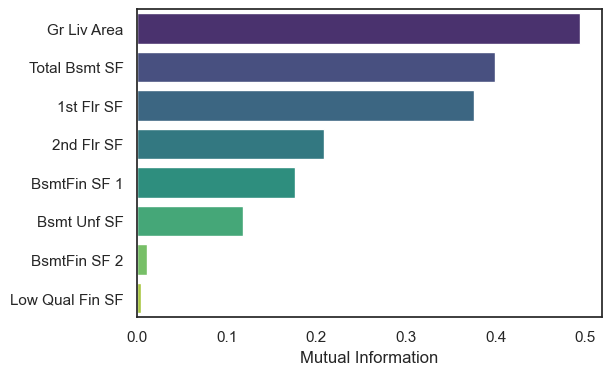

In [48]:
collinear_features = VIF(df.drop('SalePrice', axis=1))[:8].index.tolist()
X = df[collinear_features]
y = df['SalePrice']
mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'Mutual Information': mi}, index=X.columns).sort_values(by='Mutual Information', ascending=False)
sns.barplot(y=mi_df.index, x=mi_df['Mutual Information'], palette='viridis');

Dropping only Low Qual Fin SF and BsmtFin SF 2 did not resolve our multicollinearity issue. Consequently, we are also dropping the 2nd Flr SF as our examination of the correlation matrix revealed a significant correlation between 2nd Flr SF and Gr Liv Area. Besides, its information is already captured by the 1st Flr SF. 

In [49]:
df = df.drop(['Low Qual Fin SF', 'BsmtFin SF 2', '2nd Flr SF'], axis=1)

In [50]:
# Re check VIF
VIF(df.drop('SalePrice', axis=1)).head(10)

,VIF
Total Bsmt SF,9.885
Bsmt Unf SF,8.145
BsmtFin SF 1,7.805
Gr Liv Area,7.477
Year Built,4.778
1st Flr SF,4.412
TotRms AbvGrd,4.339
Garage Yr Blt,4.238
Overall Qual,3.156
Garage Area,2.907


That's a lot better!

The general rule of thumb is that VIFs exceeding 4 warrant further investigation, while VIFs exceeding 10 are signs of serious multicollinearity requiring correction.

We still have features with VIF > 4, we will retain them and apply regularization technique such as Ridge or Lasso.

<h1 style="font-size: 1.8em; background-color: #CFB87C; padding: 0.8em">More Feature Engineering</h1>

Next, we will further  investigate features that have 0 mutual information with the target variable.

In [51]:
X = df.select_dtypes('number').drop('SalePrice', axis=1)
y = df['SalePrice']
mi = mutual_info_regression(X, y)
mi_df = pd.DataFrame({'MI': mi}, index=X.columns).sort_values(by='MI', ascending=False)
mi_df.tail(5)

,MI
Kitchen AbvGr,0.016
Screen Porch,0.015
Bsmt Half Bath,0.012
3Ssn Porch,0.000
Mo Sold,0.000


Is the specific month in which a house is sold an important feature?

Currently, it has 0 mutual information with the SalePrice. But let's take a look at its distribution plot.

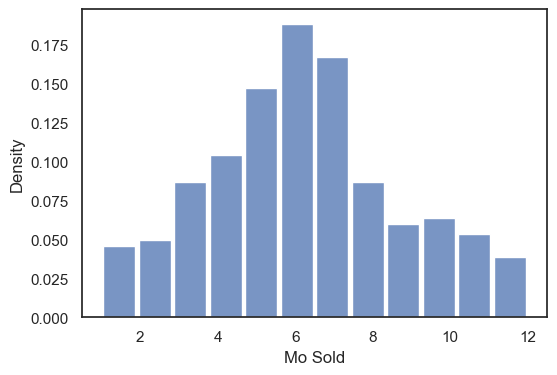

In [52]:
sns.histplot(data=df['Mo Sold'], stat='density', bins=12, shrink=0.9);

In [53]:
# If anova result is statistically significant => the feature is important to predict target
def anova(df, feature, target):
    groups = df[feature].unique()
    grouped_values = []
    for group in groups:
        if len(df[df[feature] == group]) < 1:
            print('Feature', feature)
        else:
            grouped_values.append(df[df[feature] == group][target])
    return stats.f_oneway(*grouped_values)

In [54]:
anova(df, 'Mo Sold', 'SalePrice')

F_onewayResult(statistic=1.4342025809957055, pvalue=0.15035755656905497)

In [55]:
anova(df, '3Ssn Porch', 'SalePrice')

F_onewayResult(statistic=0.8823426903241179, pvalue=0.6505671689744912)

I attempted to group Month Sold into a new category to assess if it could enhance predictions. Notably, months 5, 6, and 7 appeared to exhibit higher-than-normal sales. However, upon further examination, this adjustment did not result in any improvement.

After inspecting the distributions of the features with very low mutual information, they seem to conveyed some information and so I have decided to keep them for now.

### Dealing with skewed features

In [56]:
# Check the skewness of numerical features
numeric_df = df.select_dtypes(include=['number']).drop('SalePrice', axis=1)
skewed_features = numeric_df.apply(lambda x: stats.skew(x)).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewness': skewed_features})
skewness.head(10)

,Skewness
Lot Area,13.174
3Ssn Porch,11.388
Kitchen AbvGr,4.307
Enclosed Porch,4.018
Screen Porch,3.951
Bsmt Half Bath,3.951
Mas Vnr Area,2.598
Open Porch SF,2.493
Wood Deck SF,1.844
MS SubClass,1.356


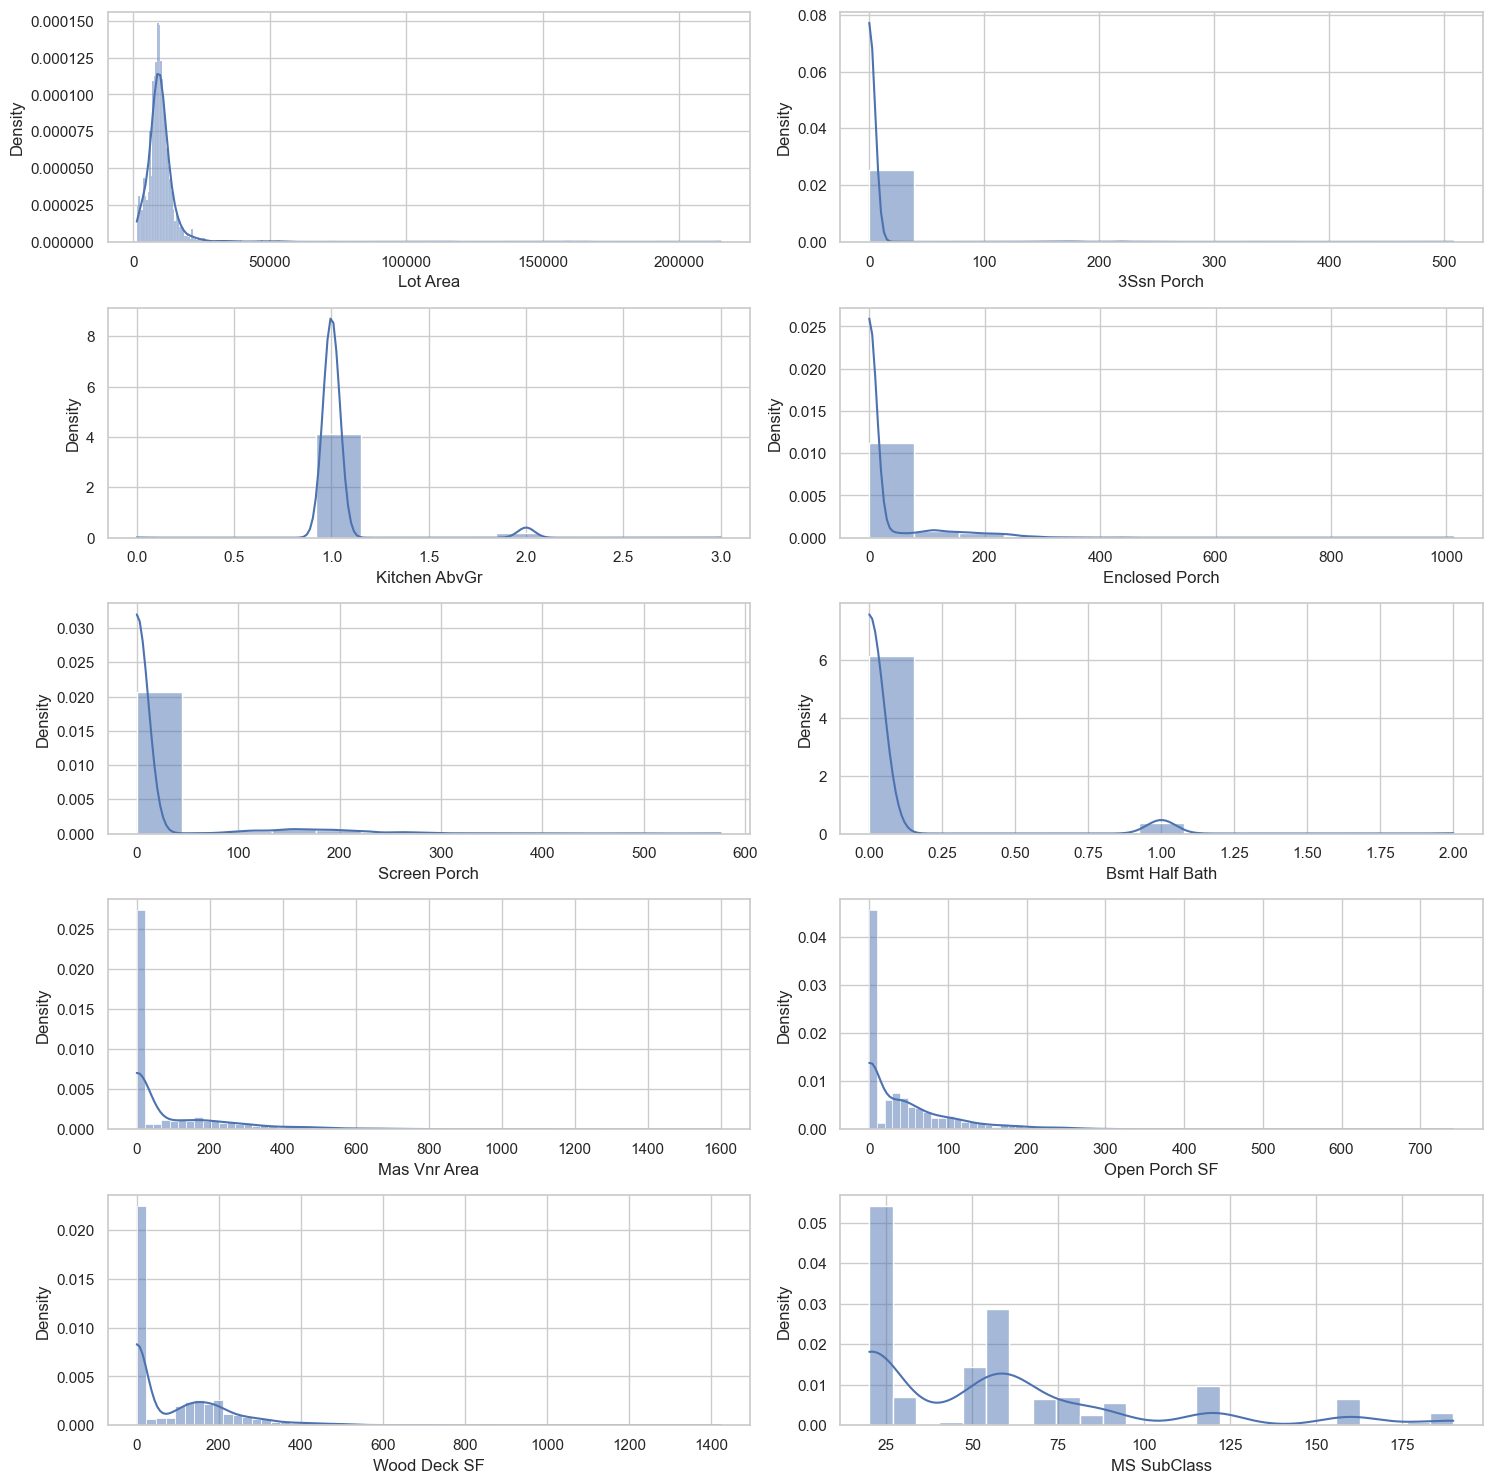

In [57]:
# Visualize distribution of features with high skewness
cols = skewness.index.tolist()[:10]
sns.set_theme(style='whitegrid')
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
axes = axes.ravel()
for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, stat='density', ax=ax)
fig.tight_layout()
plt.show()

Box Cox transformation of highly skewed features, using boxcox1p since the data contains zeros.

In [58]:
# set lambda to 0.15
skewness = skewness[abs(skewness) > 1]
skewed_features = skewness.index.tolist()
for feature in skewed_features:
    df[feature] = boxcox1p(df[feature], 0.15)
    
print("There are {} skewed numerical features that underwent BoxCox transformation.".format(skewness.shape[0]))

There are 30 skewed numerical features that underwent BoxCox transformation.


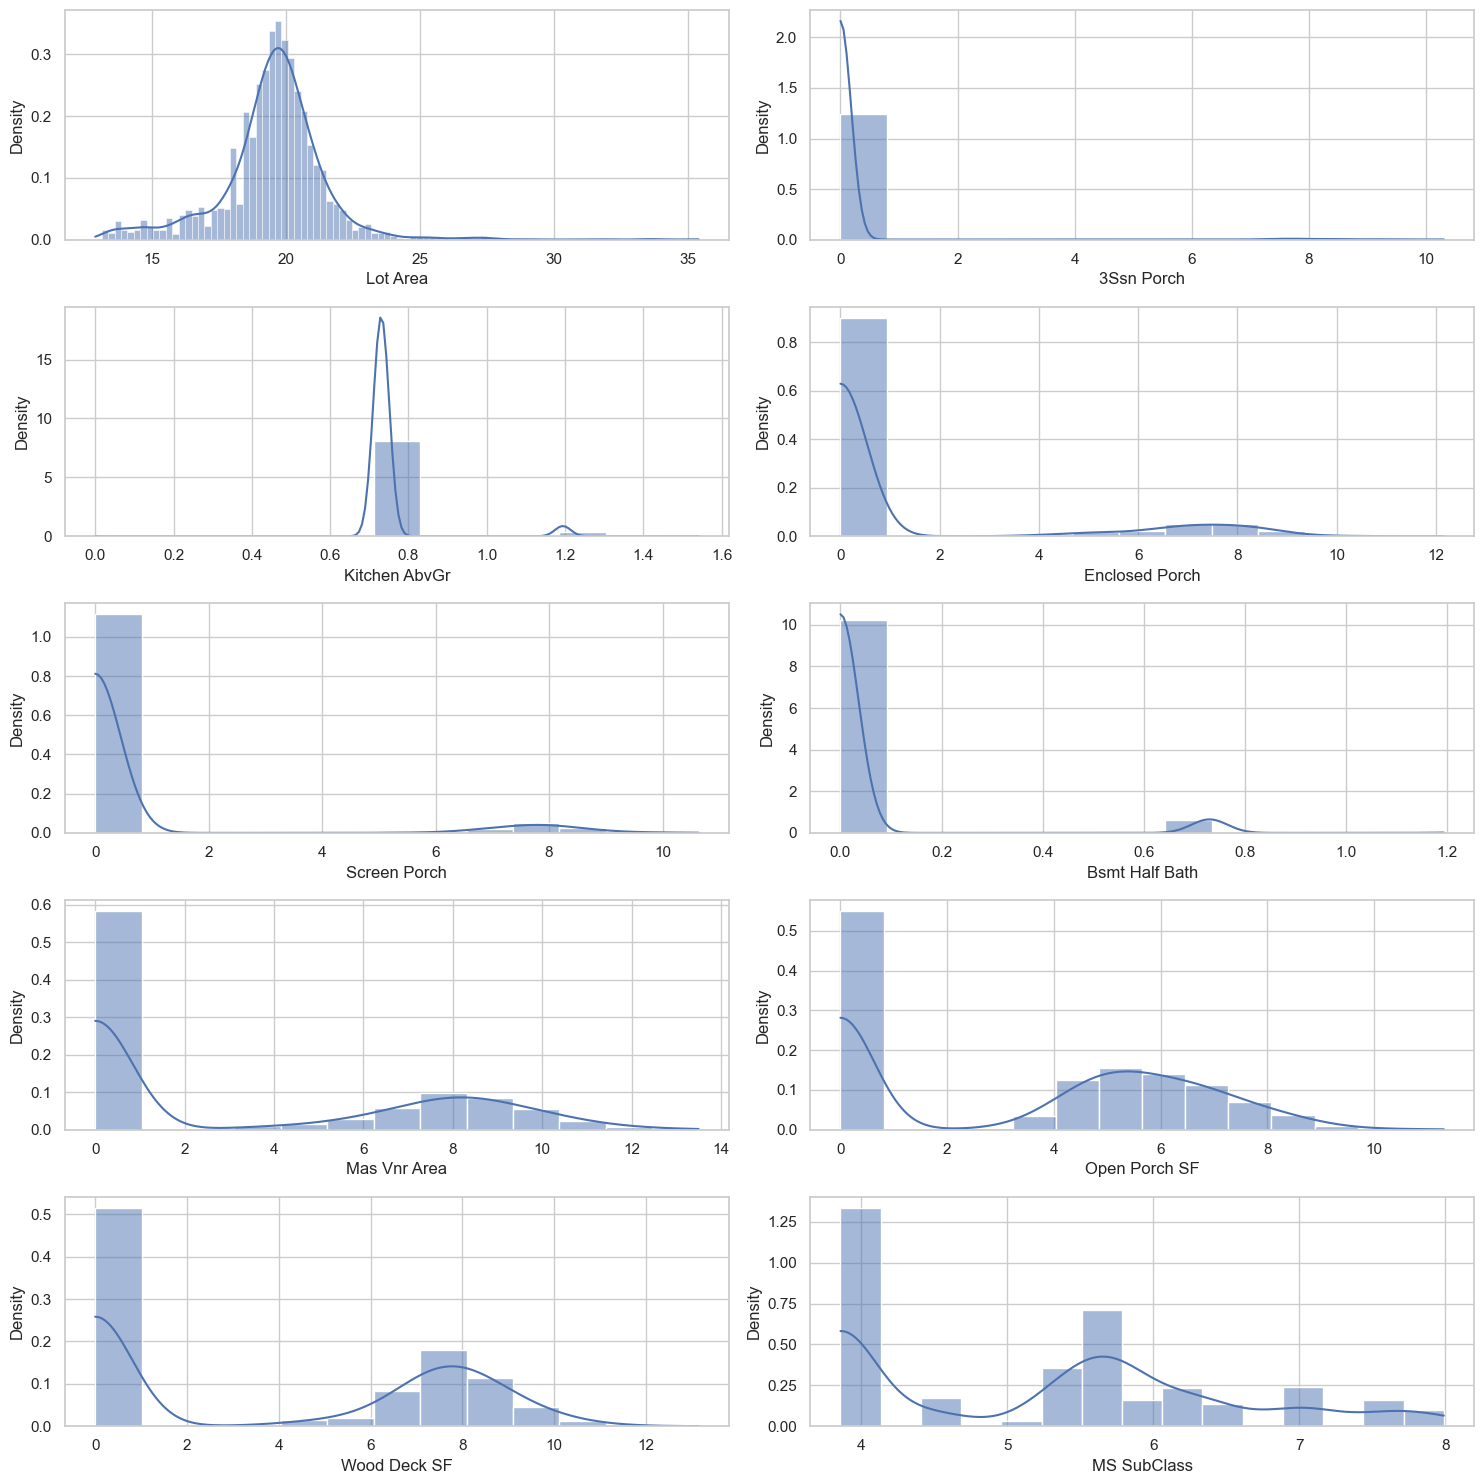

In [59]:
# Plot the distribution after Box Cox transformation
fig, axes = plt.subplots(5, 2, figsize=(15, 15))
axes = axes.ravel()
for col, ax in zip(cols, axes):
    sns.histplot(data=df[col], kde=True, stat='density', ax=ax)
fig.tight_layout()
plt.show()

When applied to a highly skewed distribution, the Box-Cox transformation can help make the distribution more symmetric and normal.

We can see that it improved their symmetry and reduce skewness.

### EDA Conclusion

After completing data cleaning to ensure our data is free from errors, missing values, and outliers, and conducting feature engineering/selection to mitigate multicollinearity, as well as addressing highly skewed features with BoxCox transformation, we expect to create a multiple regression model that not only fits the training data well but also generalizes effectively to unseen data, such as the validation set. 

<h1 style="font-size: 1.8em; background-color: #CFB87C; padding: 0.8em">Feature Encoding</h1>

First, we will divide categorical features into nominal and ordinal since different encoding method will be applied to them.

Some categorical features in our data are ordinal in nature, i.e. there is a natural ordering inherent. For example:

| Feature | 5 | 4 | 3 | 2 | 1 |
| --- | --- | --- | --- | --- | -- |
|Exter Qual | Ex (Excellent) | Gd (Good) | TA (Average/Typical) | Fa (Fair) | Po (Poor) |

Therefore, this type of feature will be encoded as an integer array.

Information on which nominal or ordinal features was given in data documentation:
https://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [60]:
categorical_features = df.select_dtypes(exclude=['number']).columns.tolist()

In [61]:
nominal = ['MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 'Lot Config', 
           'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 
           'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Foundation', 'Heating', 
           'Central Air', 'Garage Type', 'Sale Type', 'Sale Condition']

In [62]:
ordinal = [x for x in categorical_features if x not in nominal]
print(ordinal)

['Lot Shape', 'Land Slope', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Finish', 'Garage Qual', 'Garage Cond', 'Paved Drive', 'Fence']


Next, we will encode nominal features with one hot encoding, and ordinal features with their desired order.

### One hot encoding nominal features

In [63]:
df_nominal_encoded = pd.get_dummies(df[nominal], drop_first=True)

### Encoding ordinal features

By default, Sklearn's OrdinalEncoder will assign integers to labels in the order that is observed in the data. If we desire a different order, then we'll have to map them. And so that's what we will do next.

In [64]:
df['Lot Shape'].replace(['Reg', 'IR1', 'IR2', 'IR3'], [4, 3, 2, 1], inplace=True)
df['Land Slope'].replace(['Gtl', 'Mod', 'Sev'], [3, 2, 1], inplace=True)
df['Exter Qual'].replace(['Ex', 'Gd', 'TA', 'Fa'], [4, 3, 2, 1], inplace=True)
df['Exter Cond'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5, 4, 3, 2, 1], inplace=True)
df['Bsmt Qual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], [5, 4, 3, 2, 1, 0], inplace=True)
df['Bsmt Cond'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], [5, 4, 3, 2, 1, 0], inplace=True)
df['Bsmt Exposure'].replace(['Gd', 'Av', 'Mn', 'No', 'None'], [4, 3, 2, 1, 0], inplace=True)
df['BsmtFin Type 1'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], [6, 5, 4, 3, 2, 1, 0], inplace=True)
df['BsmtFin Type 2'].replace(['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None'], [6, 5, 4, 3, 2, 1, 0], inplace=True)
df['Heating QC'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5, 4, 3, 2, 1], inplace=True)
df['Electrical'].replace(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], [5, 4, 3, 2, 1], inplace=True)
df['Kitchen Qual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po'], [5, 4, 3, 2, 1], inplace=True)
df['Functional'].replace(['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'], [8, 7, 6, 5, 4, 3, 2, 1], inplace=True)
df['Fireplace Qu'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], [5, 4, 3, 2, 1, 0], inplace=True)
df['Garage Finish'].replace(['Fin', 'RFn', 'Unf', 'None'], [3, 2, 1, 0], inplace=True)
df['Garage Qual'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], [5, 4, 3, 2, 1, 0], inplace=True)
df['Garage Cond'].replace(['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None'], [5, 4, 3, 2, 1, 0], inplace=True)
df['Paved Drive'].replace(['Y', 'P', 'N'], [3, 2, 1], inplace=True)
df['Fence'].replace(['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'None'], [4, 3, 2, 1, 0], inplace=True)

In [65]:
df_ordinal_encoded = df[ordinal]

In [66]:
df_ordinal_encoded.head(3)

,Lot Shape,Land Slope,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Heating QC,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Fence
0,3,3,2,3,3,4,4,4,1,2,5,3,8,4,3,3,3,2,0
1,4,3,2,3,3,3,1,3,2,3,5,3,8,0,1,3,3,3,3
2,3,3,2,3,3,3,1,5,1,3,5,4,8,0,1,3,3,3,0


### Combine nominal and ordinal features

In [67]:
df_categorical_encoded = pd.concat([df_nominal_encoded, df_ordinal_encoded], axis=1)

### Combine numerical and categorical features

In [68]:
df_numerical = df.select_dtypes(include='number').drop('SalePrice', axis=1)
df_features_encoded = pd.concat([df_numerical, df_categorical_encoded], axis=1)

In [69]:
# Total number of observation and features after cleaning and encoding of categorical features
df_features_encoded.shape

(2925, 215)

<h1 style="font-size: 1.8em; background-color: #CFB87C; padding: 0.8em">Modelling</h1>

In [70]:
X = df_features_encoded
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [71]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
def rmsle_cv(regressor):
    scaler = RobustScaler()
    pipeline = Pipeline([('transformer', scaler), ('estimator', regressor)])
    rmsle = -cross_val_score(pipeline, X, y, scoring='neg_root_mean_squared_error',
                            cv=5, n_jobs=-1)
    return rmsle.mean()

<h1 style="font-size: 1.4em; background-color: #A2A4A3; padding: 0.8em">Lasso</h1>

Lasso objective function is to minimize:

$\min _{\beta \in \mathbb {R} ^{p}}\left\{{\frac {1}{N}}\left\|y-X\beta \right\|_{2}^{2}+\lambda \|\beta \|_{1}\right\}$

It introduces a regularization parameter $\lambda$ that penalizes the absolute values of the coefficients.

While Ridge shrinks the coefficients towards zero, Lasso encourages some of them to be exactly zero.

We use Sklearn's LassoCV to find the optimal alpha (alpha is the equivalent of regularization parameter $\lambda$ in Sklearn). LassoCV will find alphas along the regularization path.

In [73]:
lasso = LassoCV(random_state=42, cv=5, n_jobs=-1)
lasso.fit(X_train_scaled, y_train)

LassoCV(cv=5, n_jobs=-1, random_state=42)

In [74]:
alpha_opt = lasso.alpha_

In [75]:
print('RMSLE = ', rmsle_cv(lasso))
print('R2 = ', lasso.score(X_test_scaled, y_test))

RMSLE =  0.11414311754023816
R2 =  0.9293277551992667


### Top predictive features from Lasso model

We can further explore the importance of each feature using our Lasso model coefficients. It may offer insights into which features are important in determining house prices.

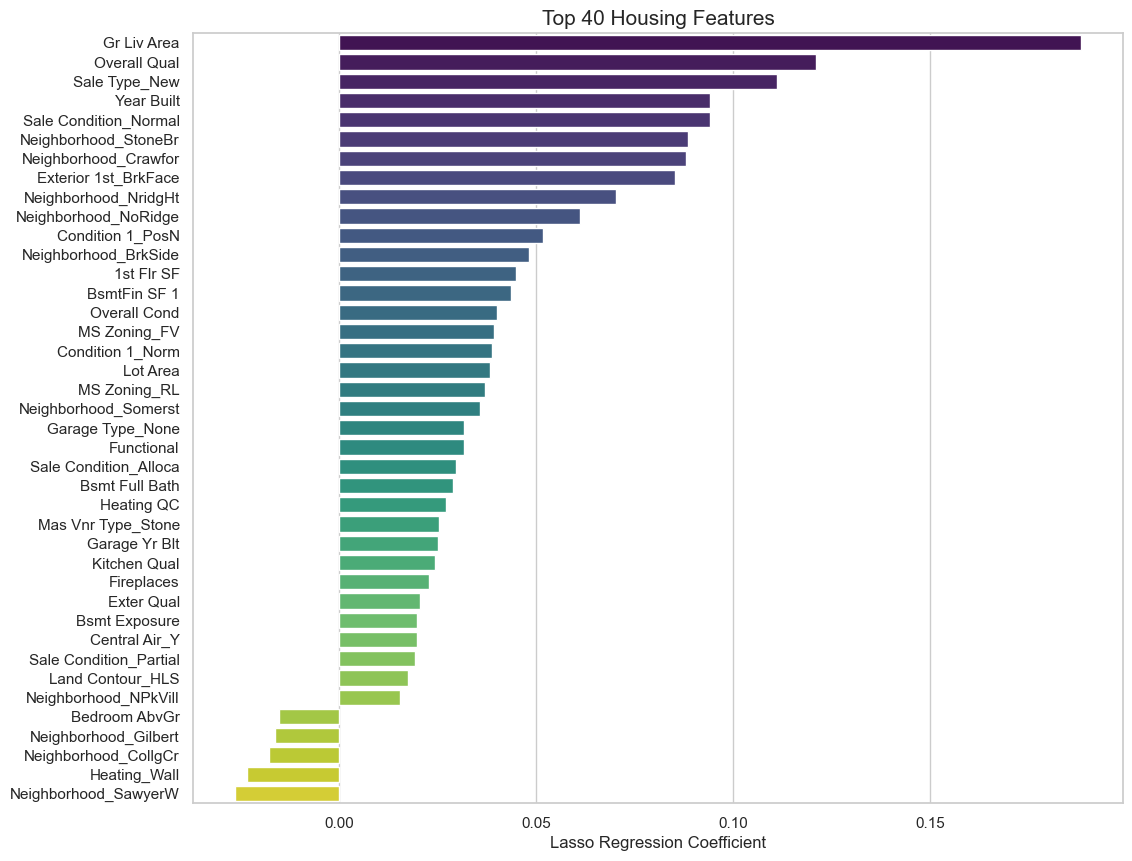

In [75]:
# Plot top 40 features (sorted by absolute value from our Lasso model coefficient)
lasso_df = pd.DataFrame({'Feature': X.columns, 'Coef': lasso.coef_, 'Abs Coef': abs(lasso.coef_)})
data = lasso_df.sort_values(by='Abs Coef', ascending=False).head(40)[['Feature', 'Coef']]
data = data.sort_values(by='Coef', ascending=False).reset_index(drop=True)

plt.figure(figsize=(12, 10))
ax = sns.barplot(data=data, y='Feature', x='Coef', orient='h', palette='viridis')
ax.set_ylabel('')
ax.set_yticklabels(data['Feature'], size=11)
ax.set_xlabel('Lasso Regression Coefficient', fontsize=12)
plt.title('Top 40 Housing Features', fontsize=15);

The top predictive features from our Lasso Regression Coefficient appear quite reasonable. Leading the list are Gr Liv Area (Above ground living area square feet) and Overall Qual (the rates of the overall material and finish of the house), followed by Sale Type_New (Home just constructed) and the Year Built (Original construction date).

Some neighborhoods, like Stone Brook, Crawford, and Northridge Heights are also strong positive predictors. Conversely we see certain neighborhood like Gilbert, College Creek and Sawyer West predict lower prices. Having a type of heating as Heating_Wall (wall heaters) also hurts the value of the house as opposed to other types of heating such as Floor Furnace, or Gas forced air furnace.

<h1 style="font-size: 1.4em; background-color: #A2A4A3; padding: 0.8em">Ridge</h1>

Ridge objective function is to minimize:

$\min _{\beta \in \mathbb {R} ^{p}}\left\{{\frac {1}{N}}\left\|y-X\beta \right\|_{2}^{2}+\lambda \|\beta \|^{2}_{2}\right\}$

It penalizes the sum of the squared coefficients, favoring models with smaller overall coefficients. The regularization parameter $\lambda$ controls the strength of the regularization, with larger values leading to more regularization.

In [76]:
# add alpha_opt from LassoCV to try
ridge = RidgeCV(alphas=(alpha_opt, 0.1, 1.0, 10.0, 12.0, 15.0))
ridge.fit(X_train_scaled, y_train)

RidgeCV(alphas=(0.00037288781498640336, 0.1, 1.0, 10.0, 12.0, 15.0))

In [77]:
print('RMSLE = ', rmsle_cv(ridge))
print('R2 = ', ridge.score(X_test_scaled, y_test))

RMSLE =  0.11347876635031044
R2 =  0.9314084687505224


<h1 style="font-size: 1.4em; background-color: #A2A4A3; padding: 0.8em">Random Forest</h1>

### Hyperparameter tuning

In [77]:
# start_time = time.time()
# params = { 'n_estimators': [1000, 1500, 1800], 
#         'max_features': ['sqrt', 'log2', None], 
#         'max_depth': [15, None], 
#         'max_leaf_nodes': [10, None], 
# } 

# grid_search = GridSearchCV(RandomForestRegressor(random_state=0), param_grid=params, n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# elapsed_time = (time.time() - start_time)/60
# print('GridSearchCV evaluation in {:.2f} minutes'.format(elapsed_time))

GridSearchCV evaluation in 10.18 minutes


In [78]:
#grid_search.best_params_

{'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'n_estimators': 1800}

### Random Forest best model

In [78]:
rf = RandomForestRegressor(n_estimators=1800, max_features='sqrt', random_state=42)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=1800, random_state=42)

In [79]:
print('RMSLE = ', rmsle_cv(rf))
print('R2 = ', rf.score(X_test_scaled, y_test))

RMSLE =  0.13687468644339745
R2 =  0.9075411717701372


<h1 style="font-size: 1.4em; background-color: #A2A4A3; padding: 0.8em">Gradient Boosting</h1>

Reference: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

### Hyperparameter tuning

There's a trade off between learning_rate and n_estimators. As the base parameter, we will use GridSearchCV to select best combination of learning_rate and n_estimators.

In [175]:
# start_time = time.time()
# params = {
#     'learning_rate': [0.01, 0.02, 0.03],
#     'n_estimators': [3000, 4000, 5000, 6000]
# }

# grid_search = GridSearchCV(GradientBoostingRegressor(random_state=0), param_grid=params, n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# elapsed_time = (time.time() - start_time)/60
# print('GridSearchCV evaluation in {:.2f} minutes'.format(elapsed_time))

GridSearchCV evaluation in 19.16 minutes


In [176]:
#grid_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 5000}

In [146]:
# maxDepths = [2, 3, 4, 5]
# train_results = []
# test_results = []

# for maxDepth in maxDepths:
#     model = GradientBoostingRegressor(max_depth=maxDepth, n_estimators=5000, learning_rate=0.01, max_features='sqrt',
#                                      min_samples_leaf=10, min_samples_split=10, loss='huber', random_state=0)
#     model.fit(X_train_scaled, y_train)
#     score = model.score(X_train_scaled, y_train)
#     train_results.append(score)
#     score = model.score(X_test_scaled, y_test)
#     test_results.append(score)

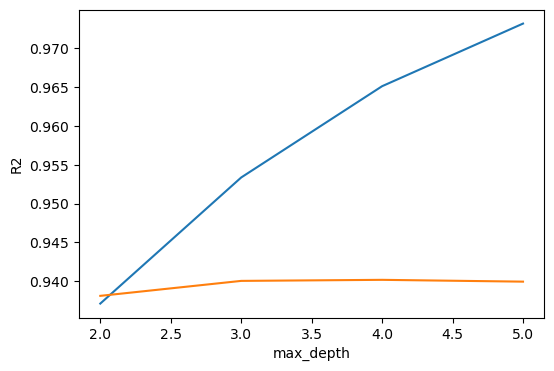

In [147]:
# plt.plot(maxDepths, train_results, label='train')
# plt.plot(maxDepths, test_results, label='test')
# plt.xlabel('max_depth')
# plt.ylabel('R2');

max_depth = 4 is optimal

### GradientBoostingRegressor best model

In [80]:
gboost = GradientBoostingRegressor(n_estimators=6000, learning_rate=0.01,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state=40)
gboost.fit(X_train_scaled, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=6000,
                          random_state=40)

In [81]:
print('RMSLE = ', rmsle_cv(gboost))
print('R2 = ', gboost.score(X_test_scaled, y_test))

RMSLE =  0.11204190246346117
R2 =  0.9405001358585043


<h1 style="font-size: 1.4em; background-color: #A2A4A3; padding: 0.8em">XGBoost</h1>

Reference:

* https://xgboost.readthedocs.io/en/release_0.82/parameter.html

* https://datascience.stackexchange.com/questions/108233/recommendations-for-tuning-xgboost-hyperparams

### Hyperparameter tuning

In [82]:
# # Step 1: tuning max_depth and min_child_weight
# start_time = time.time()
# params = {
#     'max_depth': [2, 3, 4, 6],
#     'min_child_weight': [0, 1, 1.5, 1.8]
# }

# grid_search = GridSearchCV(xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=0), 
#                            param_grid=params, n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# elapsed_time = (time.time() - start_time)/60
# print('GridSearchCV evaluation in {:.2f} minutes'.format(elapsed_time))

GridSearchCV evaluation in 2.27 minutes


In [83]:
#grid_search.best_params_

{'max_depth': 2, 'min_child_weight': 1.5}

In [85]:
# # Step 2: tuning subsample and colsample_bytree, use the optimal tuning values found in step 1
# start_time = time.time()
# params = {
#     'subsample': [0.5, 0.7, 1],
#     'colsample_bytree': [0.4, 0.5, 0.7, 1]
# }

# grid_search = GridSearchCV(xgb.XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=0,
#                                            max_depth=2, min_child_weight=0), 
#                            param_grid=params, n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# elapsed_time = (time.time() - start_time)/60
# print('GridSearchCV evaluation in {:.2f} minutes'.format(elapsed_time))

GridSearchCV evaluation in 0.83 minutes


In [86]:
#grid_search.best_params_

{'colsample_bytree': 0.7, 'subsample': 0.7}

In [88]:
# # Step 3: tuning learning_rate and n_estimators, use the optimal tuning values found in step 1 & 2
# start_time = time.time()
# params = {
#     'learning_rate': [0.01, 0.05, 0.1, 0.3],
#     'n_estimators': [100, 500, 800, 1000, 1200, 2000]
# }

# grid_search = GridSearchCV(xgb.XGBRegressor(random_state=0, max_depth=2, min_child_weight=0,
#                                            colsample_bytree=0.7, subsample=1), 
#                            param_grid=params, n_jobs=-1)
# grid_search.fit(X_train_scaled, y_train)

# elapsed_time = (time.time() - start_time)/60
# print('GridSearchCV evaluation in {:.2f} minutes'.format(elapsed_time))

GridSearchCV evaluation in 1.53 minutes


In [89]:
#grid_search.best_params_

{'learning_rate': 0.05, 'n_estimators': 2000}

### XGBoost best model

In [82]:
xgboost = xgb.XGBRegressor(n_estimators=2000, learning_rate=0.05, random_state=0, max_depth=2, 
                           min_child_weight=1.5, colsample_bytree=0.7, subsample=0.7)
xgboost.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=1.5, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=0, ...)

In [83]:
print('RMSLE = ', rmsle_cv(xgboost))
print('R2 = ', xgboost.score(X_test_scaled, y_test))

RMSE =  0.11541508317895377
R2 =  0.9372885699964738


<h1 style="font-size: 1.8em; background-color: #A2A4A3; padding: 0.8em">Stacking Regressor</h1>

Stacking Regressor is an ensemble learning technique that takes several regression models and uses their output as the input for the meta-regressor (final_estimator).

Stacking can sometimes outperform individual regressors by leveraging the strengths of different regression models.

After experimenting with different stacking configurations and cross validated the performance metrics, this combination of RidgeCV, GradientBoostingRegressor, RandomForestRegressor with LassoCV as the final estimator seems to work well with our data. And this will be our final model.

In [83]:
start_time = time.time()
estimators = [
    ('Ridge', ridge),
    ('Gradient Boost', gboost),
    ('Random Forest', rf)
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=lasso)
stacking_regressor.fit(X_train_scaled, y_train)

elapsed_time = (time.time() - start_time)/60
print('Stacking Regressor fitted in {:.2f} minutes'.format(elapsed_time))

Stacking Regressor fitted in 4.41 minutes


In [84]:
stacking_regressor

StackingRegressor(estimators=[('Ridge',
                               RidgeCV(alphas=(0.00037288781498640336, 0.1, 1.0,
                                               10.0, 12.0, 15.0))),
                              ('Gradient Boost',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         loss='huber',
                                                         max_depth=4,
                                                         max_features='sqrt',
                                                         min_samples_leaf=15,
                                                         min_samples_split=10,
                                                         n_estimators=6000,
                                                         random_state=40)),
                              ('Random Forest',
                               RandomForestRegressor(max_features='sqrt',
                                                     n_estimators=1800,
                                                     random_state=42))],
                  final_estimator=LassoCV(cv=5, n_jobs=-1, random_state=42))

In [85]:
start_time = time.time()
stacked_rmsle = rmsle_cv(stacking_regressor)

elapsed_time = (time.time() - start_time)/60
print('Stacking Regressor RMSLE Cross Validation evaluation in {:.2f} minutes'.format(elapsed_time))

Stacking Regressor RMSLE Cross Validation evaluation in 6.99 minutes


In [95]:
print('RMSLE = ', stacked_rmsle)
print('R2 = ', stacking_regressor.score(X_test_scaled, y_test))

RMSLE =  0.10841136915270644
R2 =  0.9418738838236254


### Adding another regressor to our stacked model

In [94]:
start_time = time.time()
estimators = [
    ('Ridge', ridge),
    ('Gradient Boost', gboost),
    ('Random Forest', rf),
    ('XGBoost', xgboost)
]

stacking_regressor2 = StackingRegressor(estimators=estimators, final_estimator=lasso)
stacking_regressor2.fit(X_train_scaled, y_train)

elapsed_time = (time.time() - start_time)/60
print('Stacking Regressor2 fitted in {:.2f} minutes'.format(elapsed_time))

Stacking Regressor2 fitted in 4.95 minutes


In [97]:
stacking_regressor2

StackingRegressor(estimators=[('Ridge',
                               RidgeCV(alphas=(0.00037288781498640336, 0.1, 1.0,
                                               10.0, 12.0, 15.0))),
                              ('Gradient Boost',
                               GradientBoostingRegressor(learning_rate=0.01,
                                                         loss='huber',
                                                         max_depth=4,
                                                         max_features='sqrt',
                                                         min_samples_leaf=15,
                                                         min_samples_split=10,
                                                         n_estimators=6000,
                                                         random_state=40)),
                              ('Random Forest',
                               RandomForestRegressor(max_features='sqrt',
                                                     n_es...
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=2,
                                            max_leaves=None,
                                            min_child_weight=1.5, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=2000, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=0, ...))],
                  final_estimator=LassoCV(cv=5, n_jobs=-1, random_state=42))

In [98]:
start_time = time.time()
stacked_rmsle2 = rmsle_cv(stacking_regressor2)

elapsed_time = (time.time() - start_time)/60
print('Stacking Regressor2 RMSLE Cross Validation evaluation in {:.2f} minutes'.format(elapsed_time))

Stacking Regressor2 RMSLE Cross Validation evaluation in 8.32 minutes


In [99]:
print('RMSLE = ', stacked_rmsle2)
print('R2 = ', stacking_regressor2.score(X_test_scaled, y_test))

RMSLE =  0.10832468254623642
R2 =  0.9424701499764122


Our stacked regression model has the best RMSLE so far, and a slightly better R2 compared to the gradient boosting model. 

<h1 style="font-size: 1.8em; background-color: #CFB87C; padding: 0.8em">Results and Analysis</h1>

### Cross Validation of Model Performances

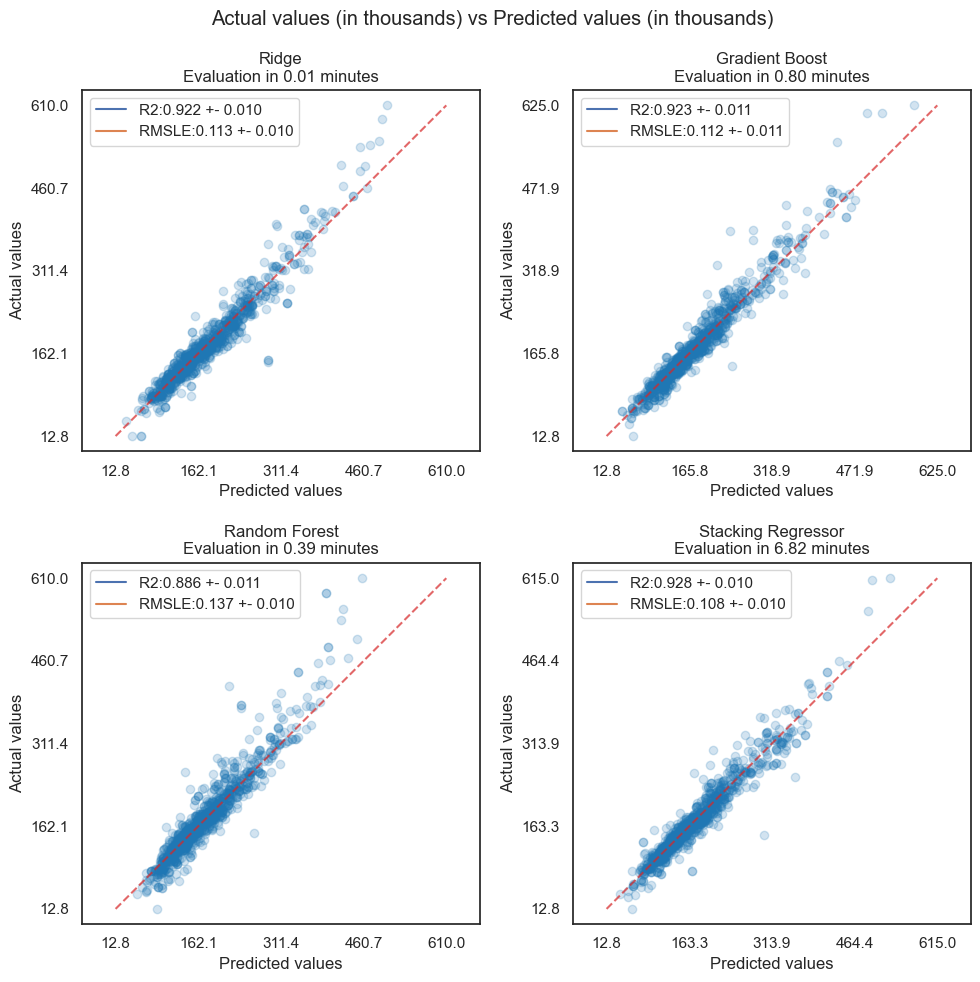

In [86]:
# Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html
sns.set_theme(style='white')
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = np.ravel(axs)
results = {}
for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor', stacking_regressor)]):
    scorers = {'R2': 'r2', 'RMSLE': 'neg_root_mean_squared_error'}
    start_time = time.time()
    scaler = RobustScaler()
    pipeline = Pipeline([('transformer', scaler), ('estimator', est)]) 
    scores = cross_validate(
        pipeline, X, y, scoring=list(scorers.values()), n_jobs=-1, verbose=0
    )
    elapsed_time = (time.time() - start_time)/60    
    y_pred = cross_val_predict(pipeline, X, y, n_jobs=-1, verbose=0)
    results[name] = scores
    scores = {
        key: (
            f"{np.abs(np.mean(scores[f'test_{value}'])):.3f} +- "
            f"{np.std(scores[f'test_{value}']):.3f}"
        )
        for key, value in scorers.items()
    }    
    display = PredictionErrorDisplay.from_predictions(
        y_true = (np.exp(y)/1000),
        y_pred = (np.exp(y_pred)/1000),
        kind='actual_vs_predicted',
        ax=ax,
        scatter_kwargs={'alpha': 0.2, 'color': 'tab:blue'},
        line_kwargs={"color": "tab:red"},
    )
    ax.set_title(f"{name}\nEvaluation in {elapsed_time:.2f} minutes")
    for name, score in scores.items():
        ax.plot([], [], '', label=f"{name}:{score}")
    ax.legend(loc='upper left')

plt.suptitle('Actual values (in thousands) vs Predicted values (in thousands)\n\n\n')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [87]:
# Display Cross Validation result of model performances
pd.DataFrame(results)

,Ridge,Gradient Boost,Random Forest,Stacking Regressor
fit_time,"[0.3314986228942871, 0.3535313606262207, 0.334...","[47.640345335006714, 46.974475145339966, 47.63...","[22.205822706222534, 22.925343990325928, 22.52...","[407.50724482536316, 406.7859528064728, 408.55..."
score_time,"[0.015636920928955078, 0.013300418853759766, 0...","[0.05052495002746582, 0.08904600143432617, 0.0...","[0.3913886547088623, 0.4088728427886963, 0.384...","[0.4400138854980469, 0.5181570053100586, 0.408..."
test_r2,"[0.9028555106567001, 0.9194906461586284, 0.927...","[0.9047471576428269, 0.9277628563736411, 0.920...","[0.866830939331382, 0.8964225628944537, 0.8854...","[0.9097992051978419, 0.9298324283865402, 0.930..."
test_neg_root_mean_squared_error,"[-0.13260432001224973, -0.11493312705902767, -...","[-0.13130690353666719, -0.10886852399425832, -...","[-0.15525666612763891, -0.13036308604417532, -...","[-0.12777731857736327, -0.10729766617097583, -..."


In [88]:
# Take the average of the default-5-fold CV result
df_results = pd.DataFrame(results)
for col in df_results.columns:
    for idx in df_results.index.tolist():
        df_results.loc[idx, col] = df_results.loc[idx, col].mean()
df_results

,Ridge,Gradient Boost,Random Forest,Stacking Regressor
fit_time,0.343,47.487,22.620,405.493
score_time,0.013,0.072,0.384,0.475
test_r2,0.922,0.923,0.886,0.928
test_neg_root_mean_squared_error,-0.113,-0.112,-0.137,-0.108


I'm quite pleased with how the model performed in terms of predicted sales price versus the actual sales price. The plot above shows that the line of best fit passes through most of the points, excluding some outliers in the highest sales price range.

RMSLE and R-squared that we used in evaluating our model performances are commonly used metrics in regression tasks. RMSLE is sensitive to errors, it penalizes larger errors more heavily than smaller ones. R-squared is a measure of goodness of fit. A higher R-squared indicates that a large portion of the variability in house prices is captured by the model, suggesting a better fit.

Cross validation of our model performances revealed that the stacked regression model exhibited the most optimal performance, with the gradient boosting model followed closely behind. As an ensemble method, the stacked regressors combine the strengths of the different single regressor. Nevertheless, a drawback is evident: the training process for the stacked regressor incurs significantly higher computational expenses.

Our stacked regression model has an RMSLE score of 0.108 with standard deviation of 0.010. We achieved our goal, as this score is better than our baseline of 0.11.

Next, we will check our stacked regression model residual against regression assumptions.

### Residual Plot

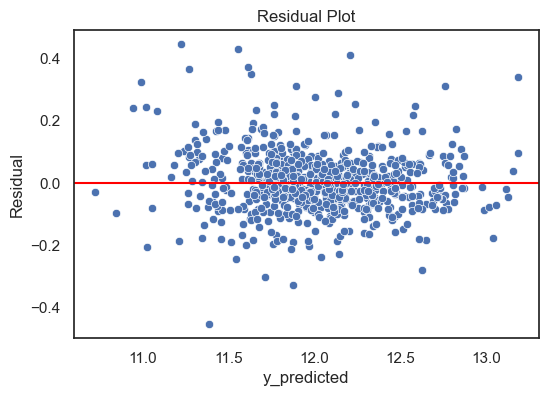

In [89]:
stacking_regressor_preds = stacking_regressor.predict(X_test_scaled)
resid = y_test - stacking_regressor_preds
df_resid = pd.DataFrame({'y_predicted': stacking_regressor_preds, 'Residual': resid})
ax = sns.scatterplot(data=df_resid, x='y_predicted', y='Residual')
ax.axhline(y=0, c='red')
plt.title('Residual Plot');

There is no definite pattern (something like linear or quadratic or funnel shaped) in the Residual plot. No violation of homoscedasticity assumption here.

Also, there is no evidence of autocorrelation here, there is no unexplained pattern due to the current value being dependent on the previous value.

Durbin Watson test to detect the present of autocorrelation:
* The statistics ranges from 0 to 4 with value of zero indicating no autocorrelation.
* Values between 1.5 to 2.5 generally show that there is no autocorrelation.

In [90]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(df_resid['Residual'])

2.026387967000412

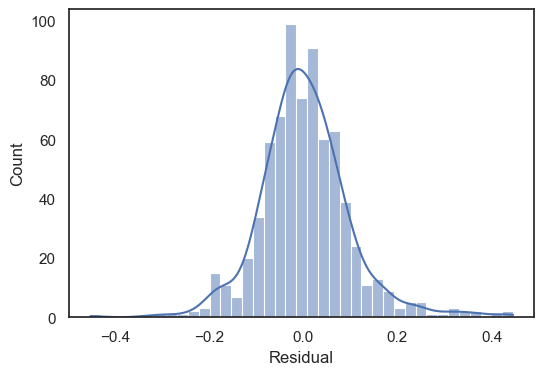

In [91]:
sns.histplot(df_resid['Residual'],kde=True);

No violation of the normality assumption on the error term/residual.

<h1 style="font-size: 1.8em; background-color: #CFB87C; padding: 0.8em">Discussion - Conclusion</h1>

This project has been a learning experience for me. Cleaning the Ames housing dataset took quite a lot of time, as it involves handling missing values, correcting errors (wrong data type and unreasonable year value), feature engineering/selection to mitigate multicollinearity and resolving highly skewed features. Successfully addressing this preliminary step is crucial for obtaining reliable insights and constructing a good predictive model.

Feature engineering of Month Sold did not work as expected. I attempted to group Month Sold into a new category expecting it would give better information in predicting the sales price. Notably, months 5, 6, and 7 appeared to exhibit higher-than-normal sales. However, this adjustment did not result in any significant improvement.

Hyperparameter tuning was a time-consuming process. It's a trade-off between computational cost, search space size, and the need for optimized hyperparameters.

As an ensemble method, the stacked regressors combine the strengths of the different single regressor. Nevertheless, a drawback is evident: the training process for the stacked regressor incurs significantly higher computational expenses.

Although the goal of achieving a model with a score below 0.11 has been met, I believe we can further improve by creating interaction terms between features and incorporating them into our model.